# A Monte Carlo Projection of the Annual Cost of Shipping Carbon from Europe to US Ports


## Revision

An earlier version of this report had reported values that were erroneously elevated by a decimal error in the meters to km conversion of distances between ports.  I apologize for unintentionally publishing misleading information.

Situations like this one, are why I always publish with code.  Transparency is the key to rigor. 


## Introduction

I produced an earlier [report](https://blog.jnapolitano.io/wells-near-ports/) that identified potential ports that may be suitable terminals for carbon imports into the United States for storage or industrial applications.  

Following that report, I became interested in what could be the annual economic value of shipping CO2.  In this report, I analyze the results of a Monte Carlo simulation I developed in Python (documented at the end of this page) that projects the annual cost of shipping carbon across the Atlantic from Europe to the United States.


## Methodology


### Modeling Dynamic Variables
To account for dynamic variables I designed a Monte Carlo simulation that randomly selected variables across normal distributions bounded by minima and maxima.

The current simulation includes:
* Variable shipping distances
* Variable shipping capacity
* Variable ports of origin
* Variable terminal ports
* Variable round trip shipping duration

Fixed variables include:
* Cost of Transport per ton (though this will be converted to a random distribution as soon as I find a better data source)


### Modeling the Shipping Infrastructure


#### Source 
Susanna Dorigoni, Luigi Mazzei, Federico Pontoni, and Antonio Sileo
IEFE – Centre for Research on Energy and Environmental Economics and Policy,
Università Bocconi, Milan, Italy


#### Modeling the Capacity of Tankers

To complete this analysis, I converted values found for lng shipping to super critical co2.  To do this,  I converted LNG capacties to super critical Co2 with the following conversion factors:
* 1 tonne co2 super critical = 2.64812 meter cubed super critical co
* 1 tonnes LNG = 2.21 m3 LNG (liquid) 
* 1 tonne co2 super critical = 544.66 m^3 gaseous


The capacity range: 
* The lower bound of the distribution is 33358 cubic meteres
* The upper bound is 175132
* The median provided is 114723
* The standard deviation is 5 (surprisingly homogeneous)


#### Modeling the Number of Tankers


The number of tankers in the Atlantic basin dedicated to LNG transort recorded in 2008 was 63.  I calculated a rough estimate of 25 percent of these being used to transport carbon annually.  A better source is needed to accurately model.  If ships are used to transport both lng and carbon a random distribution designed according to a CO2 carrying probability distribution would suitably model the data.  

A total of 15 tankers were modeled in this example.  

## Findings

Carbon capture is likely a billion dollar industry at scale.  

Across 500 iterations of modeling we see about $57.7 million dollars worth of economic activity annualy.




### The Take Away

The Carbon capture and storage economiy is likely a billion dollar economy at scale.  In just reviewing shipping super critical CO2 from Europe to the United States, a $57.7 million USD annual industry could develop as nations move towards a net carbon zero economy. 

## Limitations of the Model 

The model as it is presented in this report is unconstrained.  A more accurate portrayal of what would be possible with current systems in place could be designed with better data.  It is also important to note that I have not included incentives into the model.  It is entirely possible that government subsidies could prove the carbon shipping industry to be more expansive than presented here.

## Data Analysis

In [22]:
annual_price_samples_df.describe()

,cost_in_usd,cost_in_usd_billions
count,5.000000e+02,5.000000e+02
mean,5.744345e+07,5.744345e+07
std,1.191639e+06,1.191639e+06
min,5.351741e+07,5.351741e+07
25%,5.663254e+07,5.663254e+07
50%,5.740286e+07,5.740286e+07
75%,5.827798e+07,5.827798e+07
max,6.081661e+07,6.081661e+07


## Calculating the Confidence Interval

The data is nearly normal.  I could test for normality, but that would be beyond the scope of this analysis.  Also, by design the Monte Carlo model should produce a normal distribution with sufficient samples.  

In [23]:

st.norm.interval(alpha=0.90, loc=np.mean(annual_price_samples_df['cost_in_usd']), scale=st.sem(annual_price_samples_df['cost_in_usd']))

(57355794.336350285, 57531108.50357006)

It is safe to assume that 90 percent of the time we would see an annual cost of $57,355,794 to $57,531,109 USD with the assumptions of the model taken into account.  

### Monte Carlo Histogram

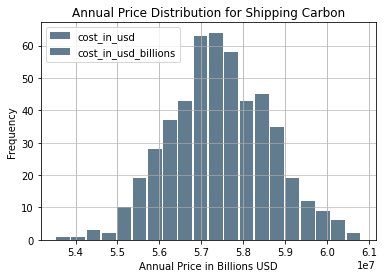

In [24]:
annual_price_samples_df.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Annual Price Distribution for Shipping Carbon')
plt.xlabel('Annual Price in Billions USD')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

## Data Imports and Manipulation

### The Shipping Dataframe

The shipping dataframe is the basis of the simulation.  It is used to tabulate total cost and to record the values of variables.

#### Capacity Distribution and Number of Ships Calculation

In [3]:
# Capacity range
# 40,000 m3 71,500 to 210,000

#Susanna Dorigoni, Luigi Mazzei, Federico Pontoni, and Antonio Sileo
#IEFE – Centre for Research on Energy and Environmental Economics and Policy,
#Università Bocconi, Milan, Italy

# I'm sure a better report is available but this is a start
# cubic meters unit

### a rough estimate of global suplly dedicated to co2 shipping

# I will probably need a better metric but this is a good start that can be modified later when necessary

ships = int(63*.25)
ships


conversion_factor = 2.21/2.65
conversion_factor

lower_bound = int(40000 * conversion_factor)
upper_bound = int(210000 * conversion_factor)

median = 137564 * conversion_factor
standard_dev = 6.63 * conversion_factor  #file:///Users/jnapolitano/Downloads/LNG_Shipping_a_Descriptive_Analysis.pdf

cap_range = range(lower_bound, upper_bound)

cap_distribution = np.random.normal(loc=median , scale=standard_dev, size=ships)



#### The Shipping Df

In [4]:
shipping_df = pd.DataFrame(cap_distribution, columns=['co2_capacity_cubic_meters'])
shipping_df['days_to_port'] = 0
shipping_df['europe_port'] = ''
shipping_df["us_port"] =''
shipping_df['distance'] =''
shipping_df['price'] = 0
shipping_df['cost_per_day'] = 0
shipping_df['co2_capacity_tonnes'] = shipping_df['co2_capacity_cubic_meters']/544.66 ## Verify this factor.  It seems to high
shipping_df

,co2_capacity_cubic_meters,days_to_port,europe_port,us_port,distance,price,cost_per_day,co2_capacity_tonnes
0,114719.277384,0,,,,0,0,210.625486
1,114719.302198,0,,,,0,0,210.625532
2,114717.986907,0,,,,0,0,210.623117
3,114720.952261,0,,,,0,0,210.628561
4,114720.134738,0,,,,0,0,210.627060
5,114727.030286,0,,,,0,0,210.639721
6,114721.222398,0,,,,0,0,210.629057
7,114724.259547,0,,,,0,0,210.634634
8,114729.358745,0,,,,0,0,210.643996
9,114727.005543,0,,,,0,0,210.639675


### The European Ports Df

In [5]:

gisfilepath = "/Users/jnapolitano/Projects/data/energy/PORT_2013_SH/Data/PORT_PT_2013.shp"


ports_df = gpd.read_file(gisfilepath)

ports_df = ports_df.to_crs(epsg=3857)

### Filtered Wells DataFrame

In [6]:
## Importing our DataFrames

gisfilepath = "/Users/jnapolitano/Projects/data/energy/filtered-wells.geojson"


filtered_df = gpd.read_file(gisfilepath)

filtered_df = filtered_df.to_crs(epsg=3857)



#### Getting Map Conditions for Us Port Filtering


In [7]:
map_conditions = filtered_df.TERMID.unique().tolist()

### US Ports Dataframes

In [8]:
## Importing our DataFrames

gisfilepath = "/Users/jnapolitano/Projects/data/energy/Liquified_Natural_Gas_Import_Exports_and_Terminals.geojson"


terminal_df = gpd.read_file(gisfilepath)

terminal_df = terminal_df.to_crs(epsg=3857)



In [9]:
terminal_df.drop(terminal_df[terminal_df['STATUS'] == 'SUSPENDED'].index, inplace = True)
terminal_df.rename(columns={"NAME": "TERMINAL_NAME"})
terminal_df['TERMINAL_GEO'] = terminal_df['geometry'].copy()


In [10]:
port_terminals_df = terminal_df.query('TERMID in @map_conditions').copy()
port_terminals_df['co2_capacity_mmta'] = port_terminals_df['CURRENTCAP'] * conversion_factor
port_terminals_df['co2_capacity_metric_tons'] = port_terminals_df['co2_capacity_mmta'] * 1000000
port_terminals_df['available'] = True

## Random Distribution, Distance and Pricing Functions 

### Accounting for Random Days at Sea

As days at sea is variable I created a range between 20 and 40 days to account for a round trip to every major port in Europe.  

In [11]:

def random_day():
    lower_bound = 20
    upper_bound = 40

    median = 30
    standard_dev = 2

    days_range = range(lower_bound, upper_bound)

    days_distribution = np.random.normal(loc=median , scale=standard_dev, size=ships)


    days_randomized = np.random.choice(days_distribution, size=1)


    return (days_randomized[0].astype(np.int64))


### Accounting for Random European Ports

 I randomized the port selection process with the following function.  The data provided by EuroStat did not filter according to type of port.  Nonetheless, the distance recorded should be very similiar to those of actual LNG ports.  A better data set could be substituded directly into the function.

In [12]:

def random_europe_port():
    #select a random number along the index of the ports df.  Return the value of hte geometry at the index.  
    #select indices from the dataframe that are valid.  ie capacity has not yet been met.  
    ports_randomized = np.random.choice(ports_df.index, size=1)
    index_location = ports_randomized[0]
    return ports_df.geometry[index_location]


### Accounting for Random US Ports

I was able to filter import/export ports in the United States in to a dataset of about 15.  Like the European dataset, I randomized selection.

In [13]:

def random_us_port():
    #select a random number along the index of the ports df.  Return the value of hte geometry at the index.  

    ports_randomized = np.random.choice(port_terminals_df.index, size=1)
    index_location = ports_randomized[0]
    return port_terminals_df.geometry[index_location]


### Calculating Distance Between Ports

I calculated the shortest distance between ports based on their geographic locations with the shapley.distance function.  It returns distance in meters.  I divide by 1000 to convert into Km.   The algorithm could be improved by using official shipping data to randomize a distribution of distances between ports.  Unfortunately, I do not have that data available to me. 

In [14]:

def geo_distance(dist1,dist2):
    # return distance in km
    distance = dist1.distance(dist2)/1000
    return(distance)


### Calculating Price of Transport


The cost of transport accounts for port fees, liquification, and transport.   Unfortunately, my data is from a paper published in 2004.  I would like to find a more recent paper.   I did not convert the value of 2004 USD to 2022 because I am not sure of the validity of the conversion factors available online.  I would need a better source to correctly model the true cost of transport.  

[source](https://ieaghg.org/docs/General_Docs/Reports/PH4-30%20Ship%20Transport.pdf)

In [15]:

def price_to_transport(distance,tonnes):
    price = (distance/100) * 12 * tonnes
    return price


### Calculating Cost Per Day

In [16]:
def cost_per_day(price,distance):
    return price/distance

## Costs Per Annum Algorithm

The algorithm I used calculates the daily status of ships transporting CO2 across the Atlantic from a random European port to a random port in the United States.  It will run for 365 iterations or until the total carbon capacity of the US ports is reached.  This value could and probably should be dynamically allocated via a similiar algorithm, but I do not yet have historical probability distributions of carbon imports to determime a valid price allocation function.  

When the daily counter reaches zero for a tanker:
* The capacity is refilled to full.
* A random us port is assigned.
* A random European port is assigned.
* The distance between ports is calculated.
* The cost of transport over that distance is calculated per 100 km.
* The total shipping price of that cycle is tabulated.
* The total tonnage of that cycle is tabulated.




In [17]:

days = 365
day_counter = 0 
carbon_total_millions_metric_tons = 300000000
total_tons_shipped = 0
total_price = 0
cycle_mean_price_samples = np.zeros(shape=days)

#deduction = capacity of empty ships
for day in range(days):
    if carbon_total_millions_metric_tons >= 0:
        # must use apply to account for multiple 0 conditions.  If i simply vectorized the function across the dataframe in a single call i would assign the the same values each day 
        shipping_df['days_to_port'] = shipping_df['days_to_port'] - 1
        shipping_df['us_port'] = shipping_df.apply(lambda x:  random_us_port() if x['days_to_port']<=0 else x['us_port'], axis=1)
        shipping_df['europe_port'] = shipping_df.apply(lambda x:  random_europe_port() if x['days_to_port']<=0 else x['europe_port'], axis=1)
        shipping_df['distance'] = shipping_df.apply(lambda x:  geo_distance(x['us_port'], x['europe_port']) if x['days_to_port']<=0 else x['distance'], axis=1)
        shipping_df['price'] = shipping_df.apply(lambda x:  price_to_transport(x['distance'],x['co2_capacity_tonnes']) if x['days_to_port']<=0 else x['price'], axis=1)
        #calculate cost per day for fun...
        # query all that are = o.  Summate the capacities deduct the total 
        tmp_df=shipping_df.loc[shipping_df['days_to_port'] <= 0]
        sum_of_capacity = tmp_df['co2_capacity_tonnes'].sum()
        sum_of_price = tmp_df['price'].sum()
        mean_of_price = tmp_df['price'].mean()
        cycle_mean_price_samples[day] = mean_of_price
        shipping_df['days_to_port'] = shipping_df['days_to_port'].apply(lambda x: random_day() if x<=0 else x)
        total_tons_shipped = total_tons_shipped + sum_of_capacity
        total_price = total_price + sum_of_price
        carbon_total_millions_metric_tons = carbon_total_millions_metric_tons - sum_of_capacity
        #print(carbon_total_millions_metric_tons)
        day_counter = day_counter+1
    else: 
        break

    
    
print(day_counter)
print(total_tons_shipped)
print(total_price)
#Drop the nan, ie empty samples
cycle_mean_price = cycle_mean_price_samples[np.logical_not(np.isnan(cycle_mean_price_samples))]
#Calculate mean price of filling a ship (around a billion according to the data i have if filled to capacity.  Ridiculous.)
cycle_mean_price = cycle_mean_price.mean()
print(cycle_mean_price)


365
41073.187985943456
60039059.413350895
308098.2720296601


## Monte Carlo Simulation with 500 iterations

The annual rate of shipping can be variable according to shifting dynamics. I account for that by modeling the per annum algorithm 500 times.  Modeling would improve as n increases, but for the sake of time I limited the computation to 500 iterations

The only difference between this algorithm and the previous one is an extra for loop.  The algorithmic efficiency is surprisingly good as the I was able to vectorize tabulations with lambda functions across the dataframes.  On my laptop, I was able to complete the algorithm in about 16 minutes of run time.



In [19]:

nsamples = 500
price_samples = np.zeros(shape=nsamples)
cycle_mean_price_annual_samples = np.zeros(shape=nsamples)

for sample in range(nsamples):

    days = 365
    day_counter = 0 
    carbon_total_millions_metric_tons = 300000000 # could randomize.  Need a probability distribution based on historial data. 
    total_tons_shipped = 0
    total_price = 0
    cycle_mean_price_daily_samples = np.zeros(shape=days)


    #deduction = capacity of empty ships
    for day in range(days):
        if carbon_total_millions_metric_tons >= 0:
            # must use apply to account for multiple 0 conditions.  If i simply vectorized the function across the dataframe in a single call i would assign the the same values each day 
            shipping_df['days_to_port'] = shipping_df['days_to_port'] - 1
            shipping_df['us_port'] = shipping_df.apply(lambda x:  random_us_port() if x['days_to_port']<=0 else x['us_port'], axis=1)
            shipping_df['europe_port'] = shipping_df.apply(lambda x:  random_europe_port() if x['days_to_port']<=0 else x['europe_port'], axis=1)
            shipping_df['distance'] = shipping_df.apply(lambda x:  geo_distance(x['us_port'], x['europe_port']) if x['days_to_port']<=0 else x['distance'], axis=1)
            shipping_df['price'] = shipping_df.apply(lambda x:  price_to_transport(x['distance'], x['co2_capacity_tonnes']) if x['days_to_port']<=0 else x['price'], axis=1)
            # query all that are = o.  Summate the capacities deduct the total 
            tmp_df=shipping_df.loc[shipping_df['days_to_port'] == 0]
            sum_of_capacity = tmp_df['co2_capacity_tonnes'].sum()
            sum_of_price = tmp_df['price'].sum()
            mean_of_price = tmp_df['price'].mean()
            cycle_mean_price_daily_samples[day] = mean_of_price
            shipping_df['days_to_port'] = shipping_df['days_to_port'].apply(lambda x: random_day() if x<=0 else x)
            total_tons_shipped = total_tons_shipped + sum_of_capacity
            total_price = total_price + sum_of_price
            carbon_total_millions_metric_tons = carbon_total_millions_metric_tons - sum_of_capacity
            #print(carbon_total_millions_metric_tons)
            day_counter = day_counter+1
        else: 
            break

    #Drop the nan, ie empty samples
    cycle_mean_price = cycle_mean_price_samples[np.logical_not(np.isnan(cycle_mean_price_samples))]
    #Calculate mean price of filling a ship (around a billion according to the data i have if filled to capacity.  Ridiculous.)
    cycle_mean_price = cycle_mean_price.mean()
    cycle_mean_price_annual_samples[sample] =cycle_mean_price
        
    

    price_samples[sample] = total_price

        


### Creating the Annual Price Samples DF

In [20]:
annual_price_samples_df = pd.DataFrame(price_samples, columns=['cost_in_usd'])

In [21]:
annual_price_samples_df['cost_in_usd_billions'] = annual_price_samples_df.cost_in_usd 

## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import contextily as cx
import rtree
from zlib import crc32
import hashlib
from shapely.geometry import Point, LineString, Polygon
import numpy as np
from scipy.spatial import cKDTree
import scipy.stats as st
from shapely.geometry import Point
from haversine import Unit
from geopy.distance import distance

import warnings

warnings.filterwarnings('ignore')


/Users/jnapolitano/venvs/finance/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
